In [1]:
from analysis_tools.read_traj import ReadTraj
from analysis_tools.feature_creation import FrameToFeaturesPosition, TrajectoryToFeaturesPosition
from analysis_tools.feature_creation import FrameToFeaturesComposition, TrajectoryToFeaturesComposition
from analysis_tools.radial_distribution_function import RDF, PositionalSuceptibility
from analysis_tools.reservoir_sampler import ReservoirSampler
from analysis_tools.defect_analysis import DefectStats
from analysis_tools.pop2d import POP2D
import gc
from IPython.display import clear_output
import h5py

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
def DownSampleFrames(frames, frame_samples):
    return frames[0::max(len(frames)/frame_samples, 1)][0:frame_samples]

## Specify the conditions

In [5]:
from numpy import arange, array

### Hard disks

In [609]:
#VERSION FOR PAPER I
N_nn = 3200 #number of nearest neighbors for pca analysis
split = 1 #chunks the data up so it can be processed by the pca tool if really large
nn_inc = 100 #1 (full in paper) #reduces the number of nearest neighbors to include as features
remove_types = []
shuffle_data = True
N_batch = 1
batches_per_frame = 10 

In [6]:
#TEST
N_nn = 29 #number of nearest neighbors for pca analysis
split = 1 #chunks the data up so it can be processed by the pca tool if really large
nn_inc = 1 #1 (full in paper) #reduces the number of nearest neighbors to include as features
remove_types = []
shuffle_data = True
N_batch = 1
batches_per_frame = 1 #10 #5

In [610]:
#specify what data to read in and process
traj_type = 'gsd'
file_data = [(arange(0.550, 0.690001, 0.005), '../hoomd_disks/trajectories_4000p', 400), 
             (arange(0.695, 0.820001, 0.005),'../hoomd_disks/trajectories_4000p_longer', 400)]

### RandOrg

In [288]:
#VERSION FOR PAPER I
N_nn = 50 #number of nearest neighbors for pca analysis
split = 1 #chunks the data up so it can be processed by the pca tool if really large
nn_inc = 1 #1 (full in paper) #reduces the number of nearest neighbors to include as features
remove_types = []
shuffle_data = False
N_batch = 50
batches_per_frame = 1 

In [289]:
#specify what data to read in and process
traj_type = 'xyz'
file_data = [(arange(0.380, 0.630001, 0.005), '../RandOrg/', 400)]

In [478]:
#actual data
etas = []
[etas.extend(etas_) for etas_, _, _ in file_data]
etas = array(etas)
color_ids = []
[color_ids.extend(len(data[0])*[count]) for count, data in zip(range(len(file_data)), file_data)]
color_ids = array(color_ids)

## Read in the data

In [611]:
from numpy import array_split
from sklearn.decomposition import IncrementalPCA

In [612]:
from copy import deepcopy

In [613]:
from numpy import array

In [614]:
dim = N_nn/nn_inc
corrected_features = []
incpca_ig = IncrementalPCA(n_components=None, whiten=True) 
force_randomize = False

#loop over data sets 
for phase in ['fit_whitener', 'correct_features']:
    raw_features = []
    
    for etas_, file_base, frame_samples in file_data:

        for eta in etas_:
            print 'COMPUTATION DETAILS'
            print 'file_base = {}'.format(file_base)
            print 'eta = {}'.format(eta)

            #read in data and randomize positions if performing ideal gas correction
            filename = "{}/trajectory_{:.4f}.{}".format(file_base, eta, traj_type)
            randomize = (phase == 'fit_whitener') or force_randomize
            frames = ReadTraj(filename, traj_type, shuffle_data, randomize, remove_types)

            #control the number of total frames to analyze
            len_frames_init = len(frames)
            frames = DownSampleFrames(frames, frame_samples)
            print 'using {} frames of {} total'.format(len(frames), len_frames_init)
            
            raw_features.extend(TrajectoryToFeaturesPosition(frames, 
                                                             N_nn=N_nn,  
                                                             nn_inc=nn_inc,
                                                             N_batch=N_batch, 
                                                             batches_per_frame=batches_per_frame))
    if phase == 'fit_whitener':
        print 'Fitting the whitener\n'
        raw_features = array(raw_features)
        #incpca_ig.fit(raw_features[:,0:dim])
        incpca_ig.fit(raw_features)
    else:
        print 'Correcting features\n'
        raw_features = array(raw_features)
        #corrected_features = deepcopy(raw_features)
        #for i in range(N_batch):
        #    corrected_features[:,i*dim:(i+1)*dim] = incpca_ig.transform(raw_features[:,i*dim:(i+1)*dim])
        corrected_features = incpca_ig.transform(raw_features)
            

COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.55
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.555
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.56
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.565
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.57
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.575
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.58
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.585
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.59
using 400 frames of 1000 total
COMPUTATION DETAILS
file

using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.645
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.65
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.655
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.66
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.665
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.67
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.675
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.68
using 400 frames of 1000 total
COMPUTATION DETAILS
file_base = ../hoomd_disks/trajectories_4000p
eta = 0.685
using 400 frames of 100

# Autoencoding

In [615]:
from analysis_tools.autoencoder import AutoEncoder
from sklearn.model_selection import train_test_split

In [616]:
from keras.utils import plot_model

In [617]:
dim = corrected_features.shape[1]
print "Dimensionality: {}".format(dim)

Dimensionality: 32


### Train and test sets

In [618]:
corrected_features_train, corrected_features_test = train_test_split(corrected_features, test_size=0.25, random_state=1)

In [491]:
import keras.backend as K

In [647]:
def DensityOverlap(X_in, X_out, dim=32, sigma=0.5):
    
    #expand the dimensions in orthognal ways
    X_in = K.expand_dims(X_in, axis=1)
    X_out = K.expand_dims(X_out, axis=2)
    
    #repeat along the expanded dimension to get a vector of dim x dim matricies
    X_in = K.repeat_elements(X_in, dim, axis=1)
    X_out = K.repeat_elements(X_out, dim, axis=2)
    
    #calculate the mean density overlap
    overlap = K.exp(-K.pow(X_in-X_out, 2)/(4.0*sigma*sigma))
    overlap = K.mean(K.sum(K.sum(overlap, axis=1), axis=1), axis=0)
    
    return -overlap

### Build and train the model

In [493]:
import pydot, graphviz

In [494]:
N_nn/nn_inc

32

In [495]:
dim=len(corrected_features[0])
print dim

32


In [619]:
from keras.callbacks import ModelCheckpoint
from numpy import savetxt

In [622]:
model = AutoEncoder(dim=N_nn/nn_inc, encode_dim=1, num_clones=N_batch,
                    initial_growth=0.25, shrink=0.75,
                    activation='elu')#, kernel_initializer='lecun_normal')

In [623]:
dim

32

In [624]:
model.autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_75 (InputLayer)        (None, 32)                0         
_________________________________________________________________
model_103 (Model)            (None, 1)                 4035      
_________________________________________________________________
model_104 (Model)            (None, 32)                4066      
Total params: 8,101
Trainable params: 8,101
Non-trainable params: 0
_________________________________________________________________


In [639]:
from keras.optimizers import Adamax
opt = Adamax(lr=0.05)

In [648]:
model.Compile(optimizer=opt, loss=DensityOverlap)

In [649]:
checkpointer = ModelCheckpoint(filepath='./model/weights_linear.hdf5', verbose=1, save_best_only=True)

In [650]:
history_raw = model.Fit(corrected_features_train, corrected_features_test,
                epochs=2000, batch_size=500, shuffle=True)#, callbacks=[checkpointer])

Train on 165000 samples, validate on 55000 samples
Epoch 1/2000
165000/165000 [==============================] - 10s - loss: -802.8862 - val_loss: -802.9343
Epoch 2/2000
165000/165000 [==============================] - 10s - loss: -803.1988 - val_loss: -803.0296
Epoch 3/2000
165000/165000 [==============================] - 10s - loss: -803.2942 - val_loss: -802.9759
Epoch 4/2000
165000/165000 [==============================] - 10s - loss: -803.3360 - val_loss: -803.1526
Epoch 5/2000
165000/165000 [==============================] - 10s - loss: -803.3679 - val_loss: -803.2135
Epoch 6/2000
165000/165000 [==============================] - 10s - loss: -803.3747 - val_loss: -803.2164
Epoch 7/2000
165000/165000 [==============================] - 10s - loss: -803.4429 - val_loss: -803.2028
Epoch 8/2000
165000/165000 [==============================] - 10s - loss: -803.4264 - val_loss: -803.2327
Epoch 9/2000
165000/165000 [==============================] - 11s - loss: -803.4416 - val_loss: -803.

KeyboardInterrupt: 

### Check out the results 

In [651]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
%matplotlib inline 

In [652]:
encoded_data = model.Encode(corrected_features)

In [653]:
from numpy import mean

In [654]:
OP = []
for i in range(len(etas)):
    OP.append(mean(encoded_data[i*400:i*400+400], axis=0))

In [587]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

#highlight the transition region if found
#plt.axvspan(0.700, 0.716, alpha=0.2, color='grey')
#plt.axvspan(0.716, 0.745, alpha=0.2, color='blue')

plt.plot(encoded_data[:,0], encoded_data[:,1], marker='o', linewidth=0.0, markersize=6, color = 'orange', alpha=0.04, markerfacecolor='None') 


#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Linear (PCA)', y=1.05, fontdict = title_font)

plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

/home/ryanj/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  from ipykernel import kernelapp as app


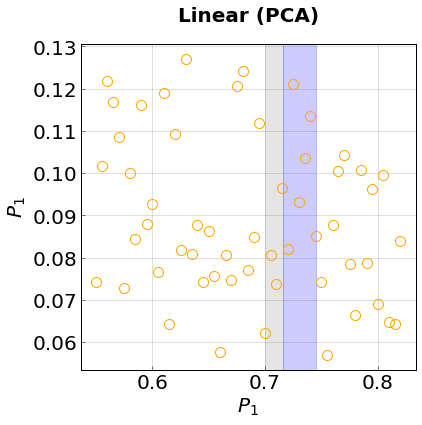

In [656]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

#highlight the transition region if found
plt.axvspan(0.700, 0.716, alpha=0.2, color='grey')
plt.axvspan(0.716, 0.745, alpha=0.2, color='blue')

plt.plot(etas, array(OP)[:,0], marker='o', linewidth=0.0, markersize=10, color = 'orange', alpha=1.0, markerfacecolor='None') 
#plt.plot(etas, array(OP)[:,1], marker='o', linewidth=0.0, markersize=10, color = 'purple', alpha=1.0, markerfacecolor='None') 


#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Linear (PCA)', y=1.05, fontdict = title_font)

plt.show()

/home/ryanj/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


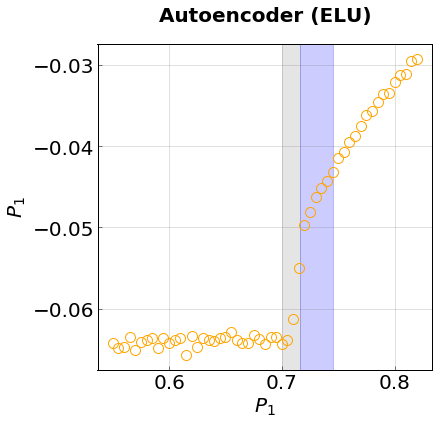

In [317]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

#highlight the transition region if found
plt.axvspan(0.700, 0.716, alpha=0.2, color='grey')
plt.axvspan(0.716, 0.745, alpha=0.2, color='blue')

plt.plot(etas, array(OP), marker='o', linewidth=0.0, markersize=10, color = 'orange', alpha=1.0, markerfacecolor='None') 


#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder (ELU)', y=1.05, fontdict = title_font)

plt.show()

/home/ryanj/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


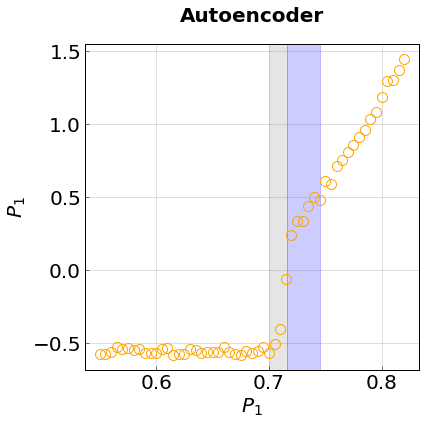

In [47]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

#highlight the transition region if found
plt.axvspan(0.700, 0.716, alpha=0.2, color='grey')
plt.axvspan(0.716, 0.745, alpha=0.2, color='blue')

plt.plot(etas, array(OP), marker='o', linewidth=0.0, markersize=10, color = 'orange', alpha=1.0, markerfacecolor='None') 


#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder', y=1.05, fontdict = title_font)

plt.show()

## Check out the 10 iterations

In [87]:
from numpy import mean, loadtxt

In [19]:
model = AutoEncoder(dim=dim, encode_dim=1, 
                    initial_growth=0.25, shrink=0.65,
                    activation='selu', kernel_initializer='lecun_normal')

In [90]:
OP_set = []
error_set = []
for i in range(10):
    print i
    model.autoencoder.load_weights('./model/weights_{}.hdf5'.format(i))
    model.Compile(optimizer='adamax', loss='mean_squared_error')
    encoded_data = model.Predict(corrected_features)
    OP = []
    for j in range(len(etas)):
        OP.append(mean(encoded_data[:,0][j*400:j*400+400]))
    OP_set.append(OP)
    error_set.append(loadtxt('./model/val_loss_{}.txt'.format(i)))

print 'linear'
model.autoencoder.load_weights('./model/weights_linear.hdf5'.format(i))
model.Compile(optimizer='adamax', loss='mean_squared_error')
encoded_data = model.Predict(corrected_features)
OP_linear = []
for i in range(len(etas)):
    OP_linear.append(mean(encoded_data[:,0][i*400:i*400+400]))
error_linear = loadtxt('./model/val_loss_linear.txt')

0
1
2
3
4
5
6
7
8
9
linear


/home/ryanj/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  app.launch_new_instance()


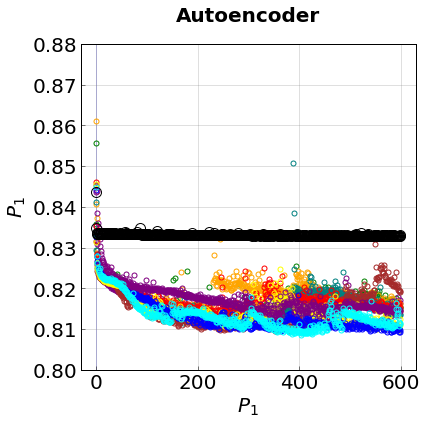

In [106]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'red', 'brown', 'yellow', 'blue', 'purple', 'cyan']

#highlight the transition region if found
plt.axvspan(0.700, 0.716, alpha=0.2, color='grey')
plt.axvspan(0.716, 0.745, alpha=0.2, color='blue')

for i in range(len(OP_set)):
    plt.plot(range(len(error_set[i])), error_set[i], marker='o', linewidth=0.0, markersize=5, color = colors[i], alpha=1.0, markerfacecolor='None')
    
plt.plot(range(len(error_linear)), error_linear, marker='o', linewidth=0.0, markersize=10, color = 'black', alpha=2.0, markerfacecolor='None') 

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
plt.ylim(0.8,0.88)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder', y=1.05, fontdict = title_font)

plt.show()

/home/ryanj/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


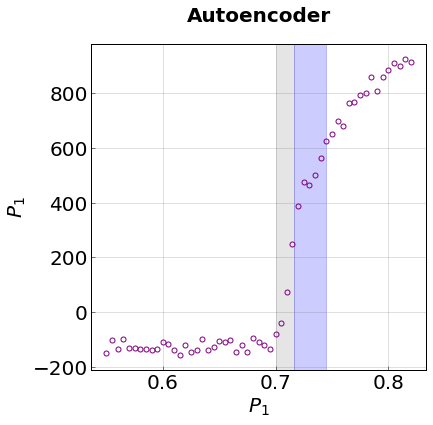

In [113]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'red', 'brown', 'yellow', 'blue', 'magenta', 'cyan']

#highlight the transition region if found
plt.axvspan(0.700, 0.716, alpha=0.2, color='grey')
plt.axvspan(0.716, 0.745, alpha=0.2, color='blue')

#for i in range(len(OP_set)):
    #plt.plot(etas, array(OP_set[i]), marker='o', linewidth=0.0, markersize=5, color = colors[i], alpha=1.0, markerfacecolor='None')
    
#plt.plot(etas, OP_linear, marker='o', linewidth=0.0, markersize=10, color = 'black', alpha=2.0, markerfacecolor='None') 
index = 1
plt.plot(etas, array(OP_set[index]), marker='o', linewidth=0.0, markersize=5, color = colors[index], alpha=1.0, markerfacecolor='None')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder', y=1.05, fontdict = title_font)

plt.show()

# Local structure analysis

In [ ]:
from copy import deepcopy
from numpy import concatenate, log, power, rint, sqrt, sum, unique, repeat, arccos, dot, transpose, append, cos, sin, hstack, maximum, minimum, pi, array, mean
from numpy.linalg import norm
from numpy.random import shuffle, choice
from sklearn import preprocessing
import warnings

#this generates NN features for the PCA analysis (or some other machine learning method as well)
def FrameToFeaturesPosition(frame, N_nn, nn_inc, N_batch, batches_per_frame):
    #extract some relevant frames level details
    coords = deepcopy(frame['coords'])
    D = float(frame['D'])
    N = float(len(coords))
    V = power(frame['L'], D)
    normalizing_distance = power(V/N, 1.0/D)
    
    #loop over the batches
    aggregated_frame_features = []
    for i in range(batches_per_frame):
        coords_batch = coords[choice(int(N), N_batch, replace=False)]

        #loop over the particles
        frame_features = []
        for particle in coords_batch:
            #nearest neighbor coordinate wrapping
            Rpj_v = particle - coords
            Rpj_v = Rpj_v - rint(Rpj_v/frame['L'])*frame['L']
            Rpj = (sqrt(sum(power(Rpj_v, 2.0), axis=1)))     #tagged particles NN

            #sorting by the distance to enable the discovery of positional order
            sorter = Rpj.argsort()
            Rpj_v = Rpj_v[sorter[::1]][1:N_nn+1]
            Rpj = Rpj[sorter[::1]][1:N_nn+1]
            
            #calculate sorted distances between the NNs after moving reference frame to tagged particle
            features = deepcopy(Rpj)
            for i in range(len(Rpj_v)-1):
                nn_Rij_v = Rpj_v[i] - Rpj_v[i+1:]
                nn_Rij_v = nn_Rij_v - rint(nn_Rij_v/frame['L'])*frame['L']
                nn_Rij = (sqrt(sum(power(nn_Rij_v, 2.0), axis=1)))
                features = concatenate((features, nn_Rij), axis=0)
 
            #create features that correspond to probe particles and their nearest neighbors
            frame_features.append(features/normalizing_distance)

        #sort by the first nearest neighbor to again provide some positional basis on which to learn correlations
        #frame_features = array(frame_features)
        #sorter = frame_features[:,5].argsort()
        #frame_features = frame_features[sorter]
        
        #TEST
        #sorter = mean(frame_features, axis=1).argsort()
        #frame_features = frame_features[sorter]
        
        shuffle(frame_features)
        #TEST
        
        aggregated_frame_features.append(array(frame_features).flatten())

    return array(aggregated_frame_features)

#this converts an entire trajectory into features
def TrajectoryToFeaturesPosition(frames, N_nn, nn_inc, N_batch, batches_per_frame):
    #print filename
    features = []
    for frame in frames: 
        aggregated_frame_features = FrameToFeaturesPosition(frame, N_nn, nn_inc, N_batch, batches_per_frame)
        for frame_features in aggregated_frame_features:
            features.append(frame_features)
    return array(features)

In [492]:
filename = '../hoomd_disks/trajectories_4000p_longer/trajectory_0.7200.gsd'
#filename = '../hoomd_spheres/trajectories_4000p/quench_1/trajectories/trajectory_0.7000.gsd'

In [493]:
frames_r = ReadTraj(filename, traj_type='gsd', shuffle_data=False, randomize=True, remove_types=[])

In [494]:
frames = ReadTraj(filename, traj_type='gsd', shuffle_data=False, randomize=False, remove_types=[])

In [496]:
features_r = TrajectoryToFeaturesPosition(frames_r, N_nn=39, nn_inc=1, N_batch=1, batches_per_frame=40) #11

In [497]:
features = TrajectoryToFeaturesPosition(frames, N_nn=39, nn_inc=1, N_batch=1, batches_per_frame=40) #11

In [498]:
incpca_ig = IncrementalPCA(n_components=None, whiten=True)

In [499]:
incpca_ig.fit(features_r)

IncrementalPCA(batch_size=None, copy=True, n_components=None, whiten=True)

In [500]:
features_corrected = incpca_ig.transform(features)

In [501]:
dim = len(features_corrected[0])
print dim

780


In [502]:
from analysis_tools.autoencoder import AutoEncoder

In [357]:
model = AutoEncoder(dim=dim, encode_dim=1, 
                    initial_growth=0.25, shrink=0.65,
                    activation='elu')#, kernel_initializer='lecun_normal')

TypeError: __init__() takes at least 4 arguments (5 given)

In [504]:
model = AutoEncoder(dim=dim, encode_dim=1, 
                    initial_growth=0.25, shrink=0.25,
                    activation='elu')#, kernel_initializer='lecun_normal')

In [505]:
model.Compile(optimizer='adamax', loss='mean_squared_error')

In [506]:
print model.layer_dims

[975, 243, 60, 15, 3, 1, 3, 15, 60, 243, 975, 780]


In [507]:
features_corrected_train, features_corrected_test = train_test_split(features_corrected, test_size=0.25, random_state=42)

In [522]:
history_raw = model.Fit(features_corrected_train, features_corrected_test,
                epochs=1000, batch_size=500, shuffle=True)

Train on 30000 samples, validate on 10000 samples
Epoch 1/1000
30000/30000 [==============================] - 8s - loss: 1.0306 - val_loss: 1.0318
Epoch 2/1000
30000/30000 [==============================] - 8s - loss: 1.0302 - val_loss: 1.0313
Epoch 3/1000
30000/30000 [==============================] - 8s - loss: 1.0301 - val_loss: 1.0312
Epoch 4/1000
30000/30000 [==============================] - 8s - loss: 1.0297 - val_loss: 1.0311
Epoch 5/1000
30000/30000 [==============================] - 8s - loss: 1.0297 - val_loss: 1.0310
Epoch 6/1000
30000/30000 [==============================] - 8s - loss: 1.0294 - val_loss: 1.0307
Epoch 7/1000
30000/30000 [==============================] - 8s - loss: 1.0294 - val_loss: 1.0304
Epoch 8/1000
30000/30000 [==============================] - 8s - loss: 1.0295 - val_loss: 1.0309
Epoch 9/1000
30000/30000 [==============================] - 8s - loss: 1.0291 - val_loss: 1.0306
Epoch 10/1000
30000/30000 [==============================] - 8s - loss: 1.028

KeyboardInterrupt: 

In [523]:
pcs = model.Encode(features_corrected)

In [61]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

#highlight the transition region if found
#plt.axvspan(0.700, 0.716, alpha=0.2, color='grey')
#plt.axvspan(0.716, 0.745, alpha=0.2, color='blue')

plt.plot(pcs[:,0], pcs[:,1], marker='o', linewidth=0.0, markersize=10, color = 'orange', alpha=0.1, markerfacecolor='None') 


#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder', y=1.05, fontdict = title_font)

plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [524]:
from numpy import zeros

In [525]:
def CreateDistanceMatrix(features):
    num_features = len(features)
    N_try = 0
    num_features_try = N_try*(N_try-1)/2
    while num_features_try < num_features:
        N_try += 1
        num_features_try = N_try*(N_try-1)/2
    
    if num_features_try != num_features:
        return 'Bad data'
    
    #build the euclidean distance matrix
    N = N_try
    EDM = zeros((N,N))
    feature_index = 0
    for i in range(0, N):
        for j in range(i+1, N):
            EDM[i][j] = features[feature_index]
            EDM[j][i] = features[feature_index]
            feature_index += 1
    
    return EDM

In [526]:
from sklearn.manifold import MDS

In [527]:
mds_model = MDS(dissimilarity='precomputed')

In [54]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

#plt.plot(ED_reconstructed[:,0], ED_reconstructed[:,1], marker='o', linewidth=0.0, markersize=20, color = 'blue', alpha=1.0, markerfacecolor='blue') 
plt.hist(pcs[:,0], bins=500, color = 'blue')

#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder', y=1.05, fontdict = title_font)

plt.show()

NameError: name 'pcs' is not defined

In [534]:
features_reconstructed = model.Decode(array([[0.2]]))[0]
features_reconstructed = incpca_ig.inverse_transform(features_reconstructed)
EDM = CreateDistanceMatrix(features_reconstructed)
ED_reconstructed = mds_model.fit_transform(EDM)

/home/ryanj/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


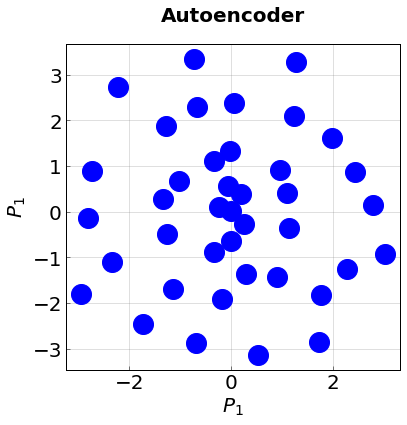

In [535]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

plt.plot(ED_reconstructed[:,0], ED_reconstructed[:,1], marker='o', linewidth=0.0, markersize=20, color = 'blue', alpha=1.0, markerfacecolor='blue') 


#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder', y=1.05, fontdict = title_font)

plt.show()

/home/ryanj/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


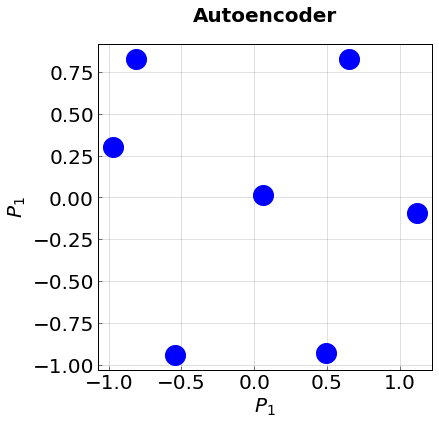

In [488]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

plt.plot(ED_reconstructed[:,0], ED_reconstructed[:,1], marker='o', linewidth=0.0, markersize=20, color = 'blue', alpha=1.0, markerfacecolor='blue') 


#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder', y=1.05, fontdict = title_font)

plt.show()

/home/ryanj/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


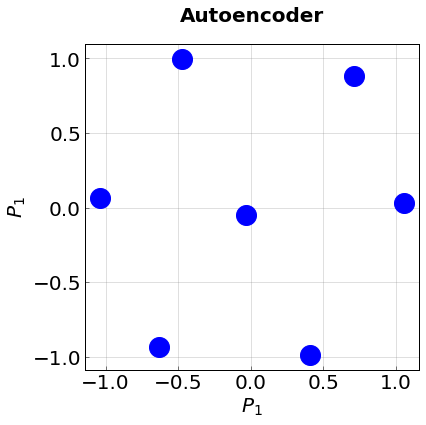

In [484]:
#plot the principal components
colors = 200*['green', 'purple', 'orange', 'teal', 'black', 'red']

plt.plot(ED_reconstructed[:,0], ED_reconstructed[:,1], marker='o', linewidth=0.0, markersize=20, color = 'blue', alpha=1.0, markerfacecolor='blue') 


#backround grid details
axes = plt.gca()
axes.grid(b = True, which = 'both', axis = 'both', color = 'gray', linestyle = '-', alpha = 0.5, linewidth = 0.5) 
axes.set_axis_bgcolor('white')  

#font scpecifications
title_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'heavy','size': 20}
axis_label_font = {'family' : 'arial', 'color'  : 'black', 'weight' : 'normal','size': 20}                                                   

#figure size and tick style
plt.rcParams["figure.figsize"] = [6,6]
plt.rc('axes',edgecolor='black',linewidth=1)
plt.tick_params(which='both', axis='both', color='black', length=4, width=0.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.yscale('log')
#plt.ylim(0,0.3)

plt.xlabel(r'$P_{1}$', y=3, fontsize=20, fontdict = axis_label_font)
plt.ylabel(r'$P_{1}$', fontsize=20, fontdict = axis_label_font)

#title and axis labels
plt.tick_params(axis='both', labelsize=20)
plt.title('Autoencoder', y=1.05, fontdict = title_font)

plt.show()

### Build a radial basis function network

In [131]:
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

In [140]:
from keras import backend as K
from keras.engine.topology import Layer
from keras.initializers import Constant
import numpy as np

In [496]:
class RadiallyPositionedBasis(Layer):
    
    def __init__(self, output_dim, rcs, init_sigma=0.1, **kwargs):
        #self consistency check to ensure that the number of rcs equals 
        #the expected number of output dimensions
        self.rcs_dim = len(rcs)
        assert output_dim == self.rcs_dim
        
        self.output_dim = output_dim
        self.rcs = K.variable(value=rcs)
        self.init_sigma = init_sigma
        super(RadiallyPositionedBasis, self).__init__(**kwargs)

    def build(self, input_shape):
        #check that we are only using only scalar quantities 
        assert input_shape[1] == 1
        
        #create the optimizable standard deviations for the gaussian basis functions
        self.sigmas = self.add_weight(name='sigmas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(value=self.init_sigma),
                                     trainable=True)
        super(RadiallyPositionedBasis, self).build(input_shape)  

    def call(self, x):
        X = K.repeat_elements(x, self.rcs_dim, axis=1)
        return K.exp(-(self.rcs-X)**2.0)/self.sigmas

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RadiallyPositionedBasis, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [572]:
from keras.layers import Input, Dense
from keras.models import Model

In [607]:
rcs = arange(0.0, 5.0001, 1.0)
print rcs

r = Input(shape=(1,))
signal = RadiallyPositionedBasis(len(rcs), rcs, init_sigma=0.01)(r)
signal = Dense(len(rcs), activation='elu')(signal)
Fr = Dense(1, activation='linear')(signal)

# this model maps an input to its reconstruction
model = Model(r, Fr)

[ 0.  1.  2.  3.  4.  5.]


In [608]:
from numpy import cos, transpose

In [609]:
r_train = transpose([arange(0.0,5.0,0.0001)])
Fr_train = cos(r_train)

In [610]:
model.compile(optimizer='adamax', loss='mean_squared_error')

In [611]:
model.fit(r_train, Fr_train,
                epochs=50,
                batch_size=20,
                shuffle=True)

Epoch 1/50
50000/50000 [==============================] - 0s - loss: 6.5522     
Epoch 2/50
50000/50000 [==============================] - 0s - loss: 0.1371     
Epoch 3/50
50000/50000 [==============================] - 0s - loss: 0.0227     
Epoch 4/50
50000/50000 [==============================] - 0s - loss: 0.0027     
Epoch 5/50
50000/50000 [==============================] - 0s - loss: 8.8110e-04     
Epoch 6/50
50000/50000 [==============================] - 0s - loss: 3.0172e-04     
Epoch 7/50
50000/50000 [==============================] - 0s - loss: 1.5949e-04     
Epoch 8/50
50000/50000 [==============================] - 0s - loss: 9.3706e-05     
Epoch 9/50
50000/50000 [==============================] - 0s - loss: 6.1320e-05     
Epoch 10/50
50000/50000 [==============================] - 0s - loss: 5.2069e-05     
Epoch 11/50
50000/50000 [==============================] - 0s - loss: 4.3518e-05     
Epoch 12/50
50000/50000 [==============================] - 0s - loss: 3.7967e-0

In [606]:
model.fit(r_train, Fr_train,
                epochs=50,
                batch_size=20,
                shuffle=True)

Epoch 1/50
50000/50000 [==============================] - 0s - loss: 66.8001     
Epoch 2/50
50000/50000 [==============================] - 0s - loss: 2.3889     
Epoch 3/50
50000/50000 [==============================] - 0s - loss: 0.0704     - ETA: 0s - los
Epoch 4/50
50000/50000 [==============================] - 0s - loss: 1.2115e-04     
Epoch 5/50
50000/50000 [==============================] - 0s - loss: 1.1211e-04     
Epoch 6/50
50000/50000 [==============================] - 0s - loss: 9.3888e-05     
Epoch 7/50
50000/50000 [==============================] - 0s - loss: 7.1616e-05     
Epoch 8/50
50000/50000 [==============================] - 0s - loss: 5.7545e-05     
Epoch 9/50
50000/50000 [==============================] - 0s - loss: 4.7433e-05     
Epoch 10/50
50000/50000 [==============================] - 0s - loss: 4.0514e-05     
Epoch 11/50
50000/50000 [==============================] - 0s - loss: 3.6632e-05     
Epoch 12/50
50000/50000 [==============================] - 

In [612]:
Fr_predict = model.predict(r_train)

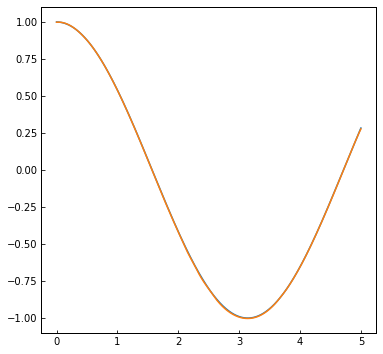

In [613]:
plt.plot(r_train, Fr_train)
plt.plot(r_train, Fr_predict)

In [620]:
from numpy.linalg import eigvalsh, eig

In [624]:
W = [[1,2,3],
     [2,1,4],
     [3,4,1]]
eig(W)

(array([ 7.07467358, -0.88679099, -3.1878826 ]),
 array([[ 0.50578521,  0.82403773, -0.25523155],
        [ 0.58437383, -0.54492509, -0.60130182],
        [ 0.63457746, -0.15497893,  0.75716113]]))

In [626]:
W = [[1,4,3],
     [4,1,2],
     [3,2,1]]
eig(W)

(array([ 7.07467358, -3.1878826 , -0.88679099]),
 array([[ 0.63457746,  0.75716113, -0.15497893],
        [ 0.58437383, -0.60130182, -0.54492509],
        [ 0.50578521, -0.25523155,  0.82403773]]))

In [622]:
W = [[1,2,4],
     [2,1,3],
     [4,3,1]]
eig(W)

(array([ 7.07467358, -3.1878826 , -0.88679099]),
 array([[-0.58437383, -0.60130182,  0.54492509],
        [-0.50578521, -0.25523155, -0.82403773],
        [-0.63457746,  0.75716113,  0.15497893]]))

In [625]:
W = [[1,2,3],
     [2,1,4],
     [3,4,1]]
eig(W)

(array([ 7.07467358, -0.88679099, -3.1878826 ]),
 array([[ 0.50578521,  0.82403773, -0.25523155],
        [ 0.58437383, -0.54492509, -0.60130182],
        [ 0.63457746, -0.15497893,  0.75716113]]))

In [ ]:
50*50

In [310]:
from keras.layers import Input, Dense, concatenate, Lambda
from keras.models import Model

#this is essentially a wrapper for keras that automates the building of an autencoder
#based on the initial dimensionality, target dimensionality, and how fast the layer 
#dimensions should shrink. this also includes an initial pre-expansion as is generally
#a good idea for autoencoders
class AutoEncoder:
    
    #determine the dimensions of the autoencoder (i.e., how big each layer is)
    def __init__(self, dim, encode_dim, num_clones,
                 initial_growth=0.10, shrink=0.75,
                 **kwargs):
        
        self.layer_dims = []
        self.encoded_layer = 0
        encode_data = Input(shape=(dim,)) 
        decode_data = Input(shape=(encode_dim,))
        
        
        ################################################
        ###build the encoder and decoder architecture###
        ################################################

        #initial expansion layer
        start_dim = int(dim*(1.0 + initial_growth))
        encoded = Dense(start_dim, **kwargs)(encode_data)
        self.layer_dims.append(start_dim)
        self.encoded_layer += 1

        #compression layers
        current_dim = int(start_dim*shrink)
        while current_dim > encode_dim:
            encoded = Dense(current_dim, **kwargs)(encoded)
            self.layer_dims.append(current_dim)
            self.encoded_layer += 1
            current_dim = int(current_dim*shrink)
        
        #final encoding layer
        #encoded = Dense(encode_dim, **kwargs)(encoded)
        encoded = Dense(encode_dim, activation='linear')(encoded) 
        self.layer_dims.append(encode_dim)
        self.encoded_layer += 1
        
        #first expansion layer
        reversed_dims = self.layer_dims[::-1][1:]
        decoded = Dense(reversed_dims[0], **kwargs)(decode_data)
        self.layer_dims.append(reversed_dims[0])
        self.encoded_layer += 1
        
        #remaining expansion layers
        for current_dim in reversed_dims[1:]:
            decoded = Dense(current_dim, **kwargs)(decoded)
            self.layer_dims.append(current_dim)
            
        #final linear layer
        decoded = Dense(dim, activation='linear')(decoded)
        self.layer_dims.append(dim)
        
        #create encoder and decoder models
        self.encoder = Model(encode_data, encoded)
        self.decoder = Model(decode_data, decoded)
        
        #create the joint model
        _encoded_ = self.encoder(encode_data)
        _decoded_ = self.decoder(_encoded_)
        self.autoencoder = Model(encode_data, _decoded_)
        
        
        #########################################
        ###build the coupled autoencoder model###
        #########################################
        
        #read in joint data and split into the columns
        joint_input = Input(shape=(dim*num_clones,))
        split_input = []
        for i in range(num_clones):
            split_input.append( Lambda(lambda x : x[:,i*dim:(i+1)*dim], output_shape=(dim,))(joint_input) )
            
        #spit out the results and concatenate
        split_output = [self.autoencoder(input) for input in split_input]
        if num_clones == 1:
            joint_output = split_output[0]
        else:
            joint_output = concatenate(split_output, axis=-1)
        
        #final model
        self.autoencoder = Model(joint_input, joint_output)

        ####create the joint model
        ####_encoded_ = self.encoder(encode_data)
        ####_decoded_ = self.decoder(_encoded_)
        ####self.autoencoder = Model(encode_data, _decoded_)
        
        return None
    
    def Compile(self, **kwargs):
        return self.autoencoder.compile(**kwargs)
    
    def Fit(self, features_train, features_test, **kwargs):
        if 'validation_data' in kwargs:
            return self.autoencoder.fit(features_train, 
                                        features_train, 
                                        **kwargs)
        else:
            return self.autoencoder.fit(features_train, 
                                        features_train,  
                                        validation_data=(features_test, features_test), 
                                        **kwargs)
        
    def Encode(self, features, **kwargs):
        return self.encoder.predict(features, **kwargs)
    
    def Decode(self, features, **kwargs):
        return self.decoder.predict(features, **kwargs)
    
    def Summary(self, **kwargs):
        return self.autoencoder.summary(**kwargs)

In [621]:
from keras.layers import Input, Dense, concatenate, Lambda, Average
from keras.models import Model

#this is essentially a wrapper for keras that automates the building of an autencoder
#based on the initial dimensionality, target dimensionality, and how fast the layer 
#dimensions should shrink. this also includes an initial pre-expansion as is generally
#a good idea for autoencoders
class AutoEncoder:
    
    #determine the dimensions of the autoencoder (i.e., how big each layer is)
    def __init__(self, dim, encode_dim, num_clones,
                 initial_growth=0.10, shrink=0.75,
                 **kwargs):
        
        self.layer_dims = []
        self.encoded_layer = 0
        encode_data = Input(shape=(dim,)) 
        decode_data = Input(shape=(encode_dim,))
        
        
        ################################################
        ###build the encoder and decoder architecture###
        ################################################

        #initial expansion layer
        start_dim = int(dim*(1.0 + initial_growth))
        encoded = Dense(start_dim, **kwargs)(encode_data)
        self.layer_dims.append(start_dim)
        self.encoded_layer += 1

        #compression layers
        current_dim = int(start_dim*shrink)
        while current_dim > encode_dim:
            encoded = Dense(current_dim, **kwargs)(encoded)
            self.layer_dims.append(current_dim)
            self.encoded_layer += 1
            current_dim = int(current_dim*shrink)
        
        #final encoding layer
        encoded = Dense(encode_dim, **kwargs)(encoded)
        #encoded = Dense(encode_dim, activation='sigmoid')(encoded) 
        self.layer_dims.append(encode_dim)
        self.encoded_layer += 1
        
        #first expansion layer
        reversed_dims = self.layer_dims[::-1][1:]
        decoded = Dense(reversed_dims[0], **kwargs)(decode_data)
        self.layer_dims.append(reversed_dims[0])
        self.encoded_layer += 1
        
        #remaining expansion layers
        for current_dim in reversed_dims[1:]:
            decoded = Dense(current_dim, **kwargs)(decoded)
            self.layer_dims.append(current_dim)
            
        #final linear layer
        decoded = Dense(dim, activation='linear')(decoded)
        self.layer_dims.append(dim)
        
        #create encoder and decoder models
        self.encoder = Model(encode_data, encoded)
        self.decoder = Model(decode_data, decoded)
        
        #create the joint model
        _encoded_ = self.encoder(encode_data)
        _decoded_ = self.decoder(_encoded_)
        self.autoencoder = Model(encode_data, _decoded_)
        
        
        #########################################
        ###build the coupled autoencoder model###
        #########################################
        
        #################
        ###the encoder###
        #################
        
        #read in joint data and split into the columns
        joint_encode_data = Input(shape=(dim*num_clones,))
        split_encode_data = []
        for i in range(num_clones):
            split_encode_data.append( Lambda(lambda x : x[:,i*dim:(i+1)*dim], output_shape=(dim,))(joint_encode_data) )
            
        #output from tied encoders
        split_encoded = [self.encoder(input) for input in split_encode_data]
        
        #average the output from each encoder
        if num_clones == 1:
            average_encoded = split_encoded[0] 
        else:
            average_encoded = Average()(split_encoded)
        
        #create the full encoder
        self.joint_encoder = Model(joint_encode_data, average_encoded)
        
        
        #################
        ###the decoder###
        #################
        
        average_encoded = Input(shape=(encode_dim,))
            
        #spit out the results and concatenate
        split_decoded = [self.decoder(average_encoded) for i in range(num_clones)]
        if num_clones == 1:
            joint_decode_data = split_decoded[0]
        else:
            joint_decode_data = concatenate(split_decoded, axis=-1)
        
        #final model
        self.joint_decoder = Model(average_encoded, joint_decode_data)
        
        
        #####################
        ###the autoencoder###
        #####################

        encoded = self.joint_encoder(joint_encode_data)
        joint_decode_data = self.joint_decoder(encoded)
        self.joint_autoencoder = Model(joint_encode_data, joint_decode_data)
        
        return None
    
    def Compile(self, **kwargs):
        return self.joint_autoencoder.compile(**kwargs)
    
    def Fit(self, features_train, features_test, **kwargs):
        if 'validation_data' in kwargs:
            return self.joint_autoencoder.fit(features_train, 
                                        features_train, 
                                        **kwargs)
        else:
            return self.joint_autoencoder.fit(features_train, 
                                        features_train,  
                                        validation_data=(features_test, features_test), 
                                        **kwargs)
        
    def Encode(self, features, **kwargs):
        return self.joint_encoder.predict(features, **kwargs)
    
    def Decode(self, features, **kwargs):
        return self.joint_decoder.predict(features, **kwargs)
    
    def Summary(self, **kwargs):
        return self.joint_autoencoder.summary(**kwargs)

In [553]:
import numpy
numpy.version.version

'1.13.3'

In [554]:
import scipy
scipy.version.version

'1.0.0'

In [555]:
numpy.show_config()

lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    define_macros = [('HAVE_CBLAS', None)]
    language = c
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    define_macros = [('HAVE_CBLAS', None)]
    language = c
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    define_macros = [('HAVE_CBLAS', None)]
    language = c
blis_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    define_macros = [('HAVE_CBLAS', None)]
    language = c
lapack_mkl_info:
  NOT AVAILABLE
blas_mkl_info:
  NOT AVAILABLE


In [ ]:
from numpy import arccos, cos, sin, array, sqrt, power, sum, pi

#this generates NN features for the PCA analysis (or some other machine learning method as well)
def FrameToFeaturesPosition(frame, N_nn, nn_inc, N_batch, batches_per_frame):
    #extract some relevant frames level details
    coords = deepcopy(frame['coords'])
    D = float(frame['D'])
    N = float(len(coords))
    V = power(frame['L'], D)
    normalizing_distance = power(V/N, 1.0/D)
    
    #loop over the batches
    aggregated_frame_features = []
    for i in range(batches_per_frame):
        ###coords_batch = coords[i*N_batch:i*N_batch+N_batch]
        coords_batch = coords[choice(int(N), N_batch, replace=False)]

        #loop over the particles
        frame_features = []
        for particle in coords_batch:
            #nearest neighbor coordinate wrapping
            Rpj_v = particle - coords
            Rpj_v = Rpj_v - rint(Rpj_v/frame['L'])*frame['L']
            Rpj = (sqrt(sum(power(Rpj_v, 2.0), axis=1)))     

            #sorting by the distance to enable the discovery of positional order
            sorter = Rpj.argsort()
            Rpj = Rpj[sorter[::1]][1:N_nn+1]
            Rpj_v = Rpj_v[sorter[::1]][1:N_nn+1]
            
            #create a list of the polar angles         
            thetapj = arccos(Rpj_v[:,0]/Rpj)*(Rpj_v[:,1] >= 0) - (-2.0*pi + arccos(Rpj_v[:,0]/Rpj))*(Rpj_v[:,1] < 0)
            sorter = theta.argsort()
            cospj = cos(thetapj)
            sinpj = sin(thetapj)
            
            #create features that correspond to probe particles and their nearest neighbors
            frame_features.append(concatenate((cospj, sinpj), axis=0))

        #sort by the first nearest neighbor to again provide some positional basis on which to learn correlations
        #frame_features = array(frame_features)
        #sorter = frame_features[:,5].argsort()
        #frame_features = frame_features[sorter]
        
        #TEST
        #sorter = mean(frame_features, axis=1).argsort()
        #frame_features = frame_features[sorter]
        
        shuffle(frame_features)
        #TEST
        
        aggregated_frame_features.append(array(frame_features).flatten())

    return array(aggregated_frame_features)

#this converts an entire trajectory into features
def TrajectoryToFeaturesPosition(frames, N_nn, nn_inc, N_batch, batches_per_frame):
    #print filename
    features = []
    for frame in frames: 
        aggregated_frame_features = FrameToFeaturesPosition(frame, N_nn, nn_inc, N_batch, batches_per_frame)
        for frame_features in aggregated_frame_features:
            features.append(frame_features)
    return array(features)

In [15]:
from numpy import arccos, cos, sin, array, sqrt, power, sum, pi

In [32]:
Rpj_v = array([[1.0,0.0],[0.0,1.0],[-1.0,0.0], [0.0,-1.0], [0.999,-0.0001]])
Rpj = (sqrt(sum(power(Rpj_v, 2.0), axis=1)))     

thetapj = arccos(Rpj_v[:,0]/Rpj)*(Rpj_v[:,1] >= 0) - (-2.0*pi + arccos(Rpj_v[:,0]/Rpj))*(Rpj_v[:,1] < 0)

In [33]:
thetapj

array([ 0.        ,  1.57079633,  3.14159265,  4.71238898,  6.28308521])

In [34]:
2*pi

6.283185307179586

In [559]:
from numpy.linalg import norm 

In [581]:
from numpy import transpose, sum

In [577]:
A = array([[1,2],[2,3],[3,4]])

In [578]:
B = A/transpose([norm(A, axis=1)])

In [573]:
A/array([[1],[2],[3]])

array([[1, 2],
       [1, 1],
       [1, 1]])

In [584]:
B

array([[ 0.4472136 ,  0.89442719],
       [ 0.5547002 ,  0.83205029],
       [ 0.6       ,  0.8       ]])

In [586]:
sum(B,axis=1)

array([ 1.34164079,  1.38675049,  1.4       ])

In [588]:
norm(B,axis=1)

array([ 1.,  1.,  1.])

In [601]:
from numpy import arccos, pi

In [617]:
r = array([0.99999,-0.00001])
(r[1]<0)*2.0*pi + (float((r[1]>=0)) - float((r[1]<0)))*arccos(r[0]/norm(r))

6.2831753070681504

In [746]:
import keras.backend as K

In [472]:
def DensityOverlap(X_in, X_out, dim, sigma=0.6):
    
    #expand the dimensions in orthognal ways
    X_in = K.expand_dims(X_in, axis=1)
    X_out = K.expand_dims(X_out, axis=2)
    
    #repeat along the expanded dimension to get a vector of dim x dim matricies
    X_in = K.repeat_elements(X_in, dim, axis=1)
    X_out = K.repeat_elements(X_out, dim, axis=2)
    
    #calculate the density overlap
    overlap = K.exp(-K.pow(X_in-X_out, 2)/(4.0*sigma*sigma))
    overlap = K.mean(K.sum(K.sum(overlap, axis=1), axis=1), axis=0)
    
    return overlap

In [473]:
AK=K.variable(value=A)
BK=K.variable(value=B)

In [475]:
DensityOverlap(AK, BK, 3, sigma=1.0).eval()

array(4.421383380889893, dtype=float32)

In [460]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [466]:
y_pred = K.variable(value=[[0],[1],[2],[3]])
y_true = K.variable(value=[[0],[0],[2],[1]])
y_pred = K.variable(value=[0,1,2,3])
y_true = K.variable(value=[0,0,2,1])

In [467]:
answer = mean_squared_error(y_true, y_pred)

In [468]:
answer.eval()

array(1.25, dtype=float32)

In [439]:
A = [[[1.,2.],[2.,3.],[3.,4.]],[[4.,5.],[5.,6.],[6.,7.]],[[7.,8.],[8.,9.],[9.,10.]],[[10.,11.],[11.,12.],[12.,13.]]]
B = [[[3.,4.],[-1.,-1.],[1.,2.]],[[2.,2.],[-2.,-2.],[2.,2.]],[[3.,3.],[-3.,-3.],[3.,3.]],[[4.,4.],[-4.,-4.],[1.,2.]]]

In [375]:
from numpy import expand_dims
from numpy import repeat, exp, power

In [456]:
A = [[1.,2.,3.],[2.,3.,4.],[3.,4.,5.],[4.,5.,6.]]
B = [[1.,-1.,1.],[2.,-2.,2.],[3.,-3.,3.],[4.,-4.,4.]]

In [440]:
Ae = expand_dims(A, axis=1)
Be = expand_dims(B, axis=2)

In [391]:
Ae

array([[[[  1.,   2.],
         [  2.,   3.],
         [  3.,   4.]]],


       [[[  4.,   5.],
         [  5.,   6.],
         [  6.,   7.]]],


       [[[  7.,   8.],
         [  8.,   9.],
         [  9.,  10.]]],


       [[[ 10.,  11.],
         [ 11.,  12.],
         [ 12.,  13.]]]])

In [392]:
Be

array([[[[ 1.,  1.]],

        [[-1., -1.]],

        [[ 1.,  1.]]],


       [[[ 2.,  2.]],

        [[-2., -2.]],

        [[ 2.,  2.]]],


       [[[ 3.,  3.]],

        [[-3., -3.]],

        [[ 3.,  3.]]],


       [[[ 4.,  4.]],

        [[-4., -4.]],

        [[ 4.,  4.]]]])

In [427]:
repeat(Ae, 3, axis=1)

array([[[[  1.,   2.],
         [  2.,   3.],
         [  3.,   4.]],

        [[  1.,   2.],
         [  2.,   3.],
         [  3.,   4.]],

        [[  1.,   2.],
         [  2.,   3.],
         [  3.,   4.]]],


       [[[  4.,   5.],
         [  5.,   6.],
         [  6.,   7.]],

        [[  4.,   5.],
         [  5.,   6.],
         [  6.,   7.]],

        [[  4.,   5.],
         [  5.,   6.],
         [  6.,   7.]]],


       [[[  7.,   8.],
         [  8.,   9.],
         [  9.,  10.]],

        [[  7.,   8.],
         [  8.,   9.],
         [  9.,  10.]],

        [[  7.,   8.],
         [  8.,   9.],
         [  9.,  10.]]],


       [[[ 10.,  11.],
         [ 11.,  12.],
         [ 12.,  13.]],

        [[ 10.,  11.],
         [ 11.,  12.],
         [ 12.,  13.]],

        [[ 10.,  11.],
         [ 11.,  12.],
         [ 12.,  13.]]]])

In [428]:
repeat(Be, 3, axis=2)

array([[[[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]],

        [[-1., -1.],
         [-1., -1.],
         [-1., -1.]],

        [[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]]],


       [[[ 2.,  2.],
         [ 2.,  2.],
         [ 2.,  2.]],

        [[-2., -2.],
         [-2., -2.],
         [-2., -2.]],

        [[ 2.,  2.],
         [ 2.,  2.],
         [ 2.,  2.]]],


       [[[ 3.,  3.],
         [ 3.,  3.],
         [ 3.,  3.]],

        [[-3., -3.],
         [-3., -3.],
         [-3., -3.]],

        [[ 3.,  3.],
         [ 3.,  3.],
         [ 3.,  3.]]],


       [[[ 4.,  4.],
         [ 4.,  4.],
         [ 4.,  4.]],

        [[-4., -4.],
         [-4., -4.],
         [-4., -4.]],

        [[ 1.,  2.],
         [ 1.,  2.],
         [ 1.,  2.]]]])

In [395]:
sigma = 1.0
Q = exp(-power(Ae-Be, 2)/(4.0*sigma*sigma))
print Q

[[[[  1.00000000e+00   7.78800783e-01]
   [  7.78800783e-01   3.67879441e-01]
   [  3.67879441e-01   1.05399225e-01]]

  [[  3.67879441e-01   1.05399225e-01]
   [  1.05399225e-01   1.83156389e-02]
   [  1.83156389e-02   1.93045414e-03]]

  [[  1.00000000e+00   7.78800783e-01]
   [  7.78800783e-01   3.67879441e-01]
   [  3.67879441e-01   1.05399225e-01]]]


 [[[  3.67879441e-01   1.05399225e-01]
   [  1.05399225e-01   1.83156389e-02]
   [  1.83156389e-02   1.93045414e-03]]

  [[  1.23409804e-04   4.78511739e-06]
   [  4.78511739e-06   1.12535175e-07]
   [  1.12535175e-07   1.60522806e-09]]

  [[  3.67879441e-01   1.05399225e-01]
   [  1.05399225e-01   1.83156389e-02]
   [  1.83156389e-02   1.93045414e-03]]]


 [[[  1.83156389e-02   1.93045414e-03]
   [  1.93045414e-03   1.23409804e-04]
   [  1.23409804e-04   4.78511739e-06]]

  [[  1.38879439e-11   7.28772410e-14]
   [  7.28772410e-14   2.31952283e-16]
   [  2.31952283e-16   4.47773244e-19]]

  [[  1.83156389e-02   1.93045414e-03]
   [ 

In [406]:
sigma = 1.0
Q = exp(-power(Ae-Be, 2)/(4.0*sigma*sigma))
print Q

[[[[  1.00000000e+00   7.78800783e-01]
   [  7.78800783e-01   3.67879441e-01]
   [  3.67879441e-01   1.05399225e-01]]

  [[  3.67879441e-01   1.05399225e-01]
   [  1.05399225e-01   1.83156389e-02]
   [  1.83156389e-02   1.93045414e-03]]

  [[  1.00000000e+00   7.78800783e-01]
   [  7.78800783e-01   3.67879441e-01]
   [  3.67879441e-01   1.05399225e-01]]]


 [[[  3.67879441e-01   1.05399225e-01]
   [  1.05399225e-01   1.83156389e-02]
   [  1.83156389e-02   1.93045414e-03]]

  [[  1.23409804e-04   4.78511739e-06]
   [  4.78511739e-06   1.12535175e-07]
   [  1.12535175e-07   1.60522806e-09]]

  [[  3.67879441e-01   1.05399225e-01]
   [  1.05399225e-01   1.83156389e-02]
   [  1.83156389e-02   1.93045414e-03]]]


 [[[  1.83156389e-02   1.93045414e-03]
   [  1.93045414e-03   1.23409804e-04]
   [  1.23409804e-04   4.78511739e-06]]

  [[  1.38879439e-11   7.28772410e-14]
   [  7.28772410e-14   2.31952283e-16]
   [  2.31952283e-16   4.47773244e-19]]

  [[  1.83156389e-02   1.93045414e-03]
   [ 

In [410]:
from numpy import sum

In [455]:
sigma = .2
Q = exp(-sum(power(Ae-Be, 2), axis=3)/(4.0*sigma*sigma))
print Q

[[[  1.92874985e-022   3.72665317e-006   1.00000000e+000]
  [  5.17098580e-036   1.38511937e-068   5.15274929e-112]
  [  1.00000000e+000   3.72665317e-006   1.92874985e-022]]

 [[  5.17098580e-036   1.38511937e-068   5.15274929e-112]
  [  1.91010169e-231   1.90336534e-307   0.00000000e+000]
  [  5.17098580e-036   1.38511937e-068   5.15274929e-112]]

 [[  5.15274929e-112   2.66212703e-166   1.91010169e-231]
  [  0.00000000e+000   0.00000000e+000   0.00000000e+000]
  [  5.15274929e-112   2.66212703e-166   1.91010169e-231]]

 [[  1.91010169e-231   1.90336534e-307   0.00000000e+000]
  [  0.00000000e+000   0.00000000e+000   0.00000000e+000]
  [  0.00000000e+000   0.00000000e+000   0.00000000e+000]]]


In [454]:
sum(sum(Q, axis=1), axis=1)

array([  2.27134375e+00,   4.52068659e-06,   3.12576439e-18,
         1.21609930e-37])

In [752]:
sum(Q, axis=(1,2))

array([ 4.78495475,  4.31372995,  4.29348876,  4.29336056])

In [288]:
filename = "../../evap_cryst/p100_N4_1/colloids.gsd"
#randomize = (phase == 'fit_whitener') or force_randomize
frames = ReadGSD(filename, False, False, [])

In [289]:
frames[0]

{'D': 3,
 'L': array([ 138.45599365,  159.87521362,  336.        ], dtype=float32),
 'coords': array([[  47.87806702,  104.18327332,   99.88435364],
        [  17.50433731,   87.10276794,   32.04560852],
        [  35.24098206,  138.11740112,  116.05601501],
        ..., 
        [  91.4042511 ,    5.84125519,   37.54380798],
        [ 136.27853394,   84.54135895,   94.87758636],
        [  34.37240601,   25.99572754,   83.35301971]], dtype=float32),
 'diameters': array([ 10.,  10.,  10., ...,  10.,  10.,  10.], dtype=float32),
 'types': array([u'C', u'C', u'C', ..., u'C', u'C', u'C'],
       dtype='<U1')}

In [290]:
min(frames[0]['coords'][:,0])

0.0094299316

In [291]:
max(frames[0]['coords'][:,0])

138.45378

In [292]:
min(frames[0]['coords'][:,1])

0.10032654

In [293]:
max(frames[0]['coords'][:,1])

159.8107

In [294]:
min(frames[0]['coords'][:,2])

12.38797

In [295]:
max(frames[0]['coords'][:,2])

218.36954

In [352]:
from scipy.stats import moment

In [358]:
corrected_features[0]

array([ 0.10015926,  0.01571595,  0.13833635, ..., -2.30546123,
        0.65707904,  0.75511496])

In [363]:
moments = []
data = corrected_features[0]
for i in range(len(data)):
    moments.append(moment(data, moment=i, axis=0, nan_policy='propagate'))
    i+=1

In [364]:
moments

[1.0,
 0.0,
 0.34374811557066842,
 0.069832196631344073,
 0.53858148815931572,
 0.33949433905729104,
 1.7088424316636792,
 1.9049694200449405,
 7.9544935251626496,
 12.422896701583964,
 46.462097091405468,
 89.887706939545239,
 311.27729001116381,
 691.88461707284398,
 2264.8370514122053,
 5509.6837307669457,
 17318.741837607897,
 44679.647015947092,
 136506.09750466683,
 365901.83683168446,
 1096377.9923320361,
 3013261.2217861204,
 8911737.6274979729,
 24898282.572352353,
 73003349.464937165,
 206181972.77317348,
 601130254.49512911,
 1709975069.0575929,
 4967243302.6189041,
 14197369765.555115,
 41144272981.725861,
 117973946606.3111,
 341376733231.70624,
 980934242914.13074,
 2835788165100.7632,
 8160304279752.4102,
 23576560823352.203,
 67910570952982.492,
 196132750400668.84,
 565321758151103.38,
 1632335750430250.0,
 4707087483462443.0,
 13589591208191238.0,
 39199855226208464.0,
 1.131627271087513e+17,
 3.264936147443385e+17,
 9.4248304617996186e+17,
 2.719626915272852e+18,
 7.

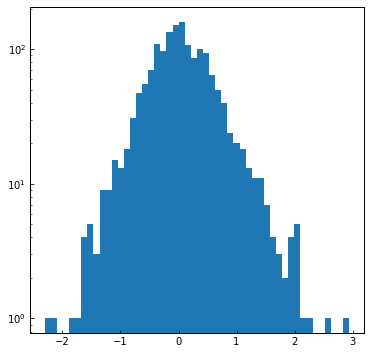

In [370]:
plt.hist(data,bins=50)
plt.yscale('log')

In [ ]:
from keras.backend import reshape(x, shape)

In [451]:
g = [[1,1,1,2,2,2,3,3,3,4,4,4],[1,2,1,2,3,2,3,4,3,4,5,4],[0,0,1,0,0,2,0,0,3,0,0,4],[0,0,1,0,0,2,0,0,3,0,0,4]]
G = K.variable(value=g)

In [452]:
output = K.reshape(G, (-1, 4, 3))

In [453]:
output.eval()

array([[[ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 3.,  3.,  3.],
        [ 4.,  4.,  4.]],

       [[ 1.,  2.,  1.],
        [ 2.,  3.,  2.],
        [ 3.,  4.,  3.],
        [ 4.,  5.,  4.]],

       [[ 0.,  0.,  1.],
        [ 0.,  0.,  2.],
        [ 0.,  0.,  3.],
        [ 0.,  0.,  4.]],

       [[ 0.,  0.,  1.],
        [ 0.,  0.,  2.],
        [ 0.,  0.,  3.],
        [ 0.,  0.,  4.]]], dtype=float32)

In [ ]:
#this generates NN features for the PCA analysis (or some other machine learning method as well)
def FrameToFeaturesPosition(frame, N_nn, nn_inc, N_batch, batches_per_frame):
    #extract some relevant frames level details
    coords = deepcopy(frame['coords'])
    D = float(frame['D'])
    N = float(len(coords))
    #DEPRECATED
    #V = power(frame['L'], D)
    V = prod(frame['L'][:frame['D']])
    normalizing_distance = power(V/N, 1.0/D)
    
    #loop over the batches
    aggregated_frame_features = []
    for i in range(batches_per_frame):
        ###coords_batch = coords[i*N_batch:i*N_batch+N_batch]
        coords_batch = coords[choice(int(N), N_batch, replace=False)]

        #loop over the particles
        frame_features = []
        for particle in coords_batch:
            #nearest neighbor coordinate wrapping
            Rpj_v = particle - coords
            Rpj_v = Rpj_v - rint(Rpj_v/frame['L'])*frame['L']
            Rpj = (sqrt(sum(power(Rpj_v, 2.0), axis=1)))     

            #sorting by the distance to enable the discovery of positional order
            sorter = Rpj.argsort()
            Rpj = Rpj[sorter[::1]]

            #create features that correspond to probe particles and their nearest neighbors
            frame_features.append((Rpj[1:N_nn+1])[0::nn_inc]/normalizing_distance)

        #sort by the first nearest neighbor to again provide some positional basis on which to learn correlations
        #frame_features = array(frame_features)
        #sorter = frame_features[:,5].argsort()
        #frame_features = frame_features[sorter]
        
        #TEST
        #sorter = mean(frame_features, axis=1).argsort()
        #frame_features = frame_features[sorter]
        
        shuffle(frame_features)
        #TEST
        
        aggregated_frame_features.append(array(frame_features).flatten())

    return array(aggregated_frame_features)

#this converts an entire trajectory into features
def TrajectoryToFeaturesPosition(frames, N_nn, nn_inc, N_batch, batches_per_frame):
    #print filename
    features = []
    for frame in frames: 
        aggregated_frame_features = FrameToFeaturesPosition(frame, N_nn, nn_inc, N_batch, batches_per_frame)
        for frame_features in aggregated_frame_features:
            features.append(frame_features)
    return array(features)